In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

start = '2015-01-01'
overall = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
stocks = overall.Symbol

In [5]:
stocks = stocks.to_list()

In [7]:
overall = overall[overall['Date added'] >= start]

In [8]:
removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]

In [10]:
removed = removed.set_index(removed.Date.Date)

In [11]:
removed.index = pd.to_datetime(removed.index)

In [12]:
removed = removed[removed.index >= start]

In [13]:
removed = removed.Removed.dropna()

In [14]:
removed

,Ticker,Security
Date,,
2023-10-18,OGN,Organon & Co.
2023-10-18,ATVI,Activision Blizzard
2023-10-03,DXC,DXC Technology
2023-09-18,LNC,Lincoln National Corporation
2023-09-18,NWL,Newell Brands
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [15]:
stocks.extend(removed.Ticker.to_list())

In [17]:
df = yf.download(stocks, start=start)["Close"]

[*********************100%%**********************]  689 of 689 completed


83 Failed downloads:
['HSP', 'WYN', 'TE', 'CFN', 'HCBK', 'TWC', 'GMCR', 'RAI', 'BRCM', 'LLTC', 'KRFT', 'MJN', 'BF.B', 'SIAL', 'WFM', 'ARG', 'DPS', 'TYC', 'SNDK', 'SPLS', 'CVC', 'CPGX', 'SWY', 'LO', 'FDO', 'JOY', 'LVLT', 'BXLT', 'CMCSK', 'CAM', 'GGP', 'STJ', 'BCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-11-22)')
['DTV', 'FBHS', 'MXIM', 'XLNX', 'CELG', 'WCG', 'WIN', 'TWTR', 'FTR', 'RHT', 'ARNC', 'AGN', 'BRK.B', 'TIF', 'QEP', 'VAR', 'LLL', 'MON', 'ADS', 'STI', 'MNK', 'ETFC', 'SIVB', 'NLSN', 'DRE', 'KSU', 'XEC', 'ESV', 'XL', 'CERN', 'LM', 'NBL', 'HFC', 'ALXN', 'ENDP', 'YHOO', 'CTXS', 'TSS', 'RTN', 'BBBY', 'FLIR', 'PBCT', 'DNR', 'INFO', 'APC', 'CXO', 'DWDP', 'FRC', 'AVP', 'VIAB']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [19]:
df.index = pd.to_datetime(df.index)

In [20]:
removed[removed.Ticker == "SBNY"].index[0]

Timestamp('2023-03-15 00:00:00')

In [22]:
df["SBNY"].index <= removed[removed.Ticker == "SBNY"].index[0]

array([ True,  True,  True, ..., False, False, False])

In [24]:
df["SBNY"] = df["SBNY"][df["SBNY"].index <= removed[removed.Ticker == "SBNY"].index[0]]

In [25]:
df["SBNY"]

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-11-16           NaN
2023-11-17           NaN
2023-11-20           NaN
2023-11-21           NaN
2023-11-22           NaN
Name: SBNY, Length: 2239, dtype: float64

In [30]:
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index <= overall[overall.Symbol == ticker]["Date added"].values[0]]

In [31]:
for ticker_rem in removed.Ticker:
    pricefilter_rem(ticker_rem)
for ticker_add in overall.Symbol:
    pricefilter_add(ticker_add)

In [32]:
removed

,Ticker,Security
Date,,
2023-10-18,OGN,Organon & Co.
2023-10-18,ATVI,Activision Blizzard
2023-10-03,DXC,DXC Technology
2023-09-18,LNC,Lincoln National Corporation
2023-09-18,NWL,Newell Brands
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [36]:
ret_df = df.pct_change(fill_method=None)
ret_df

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018738,-0.057935,-0.000556,-0.013181,-0.028172,-0.018819,-0.006433,NaN,0.000223,NaN,...,-0.027362,-0.006932,-0.021818,-0.062237,NaN,-0.020318,0.037304,-0.014077,-0.037469,-0.006003
2015-01-06,-0.015578,0.007353,-0.015590,-0.000703,0.000094,-0.004950,-0.025357,NaN,-0.011356,NaN,...,-0.005316,-0.012410,-0.013383,-0.005881,NaN,-0.012274,-0.008477,-0.007205,-0.038193,-0.009756
2015-01-07,0.013272,0.025879,-0.000566,0.021489,0.014022,0.040417,0.031829,NaN,0.008108,NaN,...,0.010133,0.025918,0.012811,0.007887,NaN,0.033138,0.024870,0.025465,0.009546,0.020643
2015-01-08,0.029975,0.028461,0.012262,0.008765,0.038422,0.010459,0.045064,NaN,0.020554,NaN,...,0.016645,0.024689,0.027530,0.007546,NaN,0.017420,0.010617,0.021359,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,0.005194,NaN,NaN,NaN,0.009042,0.004942,NaN,NaN,0.023061,NaN,...,-0.011576,0.009550,NaN,0.010176,NaN,0.009556,0.009502,NaN,-0.010255,0.010995
2023-11-17,-0.009108,NaN,NaN,NaN,-0.000105,0.000145,NaN,NaN,-0.007082,NaN,...,0.024400,0.003041,NaN,-0.000988,NaN,-0.001330,0.001076,NaN,0.010081,-0.009856
2023-11-20,0.007335,NaN,NaN,NaN,0.009278,0.000072,NaN,NaN,0.016575,NaN,...,-0.004383,0.008420,NaN,-0.009391,NaN,0.003603,0.007433,NaN,-0.008040,0.007208


In [37]:
mtl_ret = (ret_df + 1).resample("M").prod()
mtl_ret

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.931213,0.985516,0.910406,1.002775,1.071618,0.915920,1.386760,1.000000,0.996882,1.0,...,0.941721,0.963412,0.957818,0.895483,1.0,0.999032,0.995648,1.077877,0.846942,0.986608
2015-02-28,1.117554,0.945048,0.975958,0.974402,1.096449,1.002486,1.174913,1.000000,1.058311,1.0,...,1.012812,1.059564,1.036447,1.046921,1.0,1.122164,1.073952,1.090942,1.116027,1.078633
2015-03-31,0.984364,0.873563,1.135699,0.966178,0.968628,0.967603,1.177496,1.000000,0.978045,1.0,...,0.960018,0.960008,0.941392,0.980952,1.0,0.970534,0.976161,0.996376,1.009723,1.004339
2015-04-30,0.995668,1.038700,1.000000,0.955308,1.005786,1.104544,0.883208,1.000000,1.001943,1.0,...,1.027882,1.002162,0.894942,1.057110,1.0,1.091972,0.934649,1.014991,1.049630,0.959602
2015-05-31,0.995649,0.931446,1.000000,1.071469,1.040991,1.029848,0.944638,1.000000,1.046963,1.0,...,0.975163,1.020392,0.993044,0.987844,1.0,1.048278,1.038693,1.190704,1.019054,1.120441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,1.012640,1.000000,1.000000,1.058179,1.012785,1.110220,1.000000,1.187500,1.021189,1.0,...,0.999907,1.037481,1.000000,1.001154,1.0,0.993648,0.948832,1.000000,1.424051,1.092213
2023-08-31,0.994251,1.000000,1.000000,0.861406,0.956325,0.982484,1.000000,0.864380,0.924279,1.0,...,1.036833,0.893304,1.000000,0.918315,1.0,0.939784,0.862251,1.000000,0.928105,1.012866
2023-09-30,0.923598,1.000000,1.000000,1.000000,0.911322,1.014290,1.000000,1.083618,0.941205,1.0,...,1.057469,0.921003,1.000000,0.879177,1.0,0.965682,0.942075,1.000000,0.982817,0.913233


In [38]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()
mtl_12

,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,1.030819,0.621536,1.009089,0.949231,0.962773,0.899074,2.419726,1.000000,1.000223,1.0,...,0.839707,1.171770,0.773091,0.958508,1.0,1.009675,0.911182,0.899522,0.965005,1.106442
2016-01-31,0.996823,0.465815,1.108394,0.956289,0.830830,0.909694,1.649208,1.000000,0.845621,1.0,...,0.890528,1.177094,0.740319,1.054252,1.0,1.001245,0.885459,0.723700,0.946578,1.007489
2016-02-29,0.884861,0.603786,1.135699,0.958110,0.752686,0.902645,1.316170,1.000000,0.817817,1.0,...,0.905241,1.149972,0.704029,1.047899,1.0,0.893478,0.804137,0.678528,0.797307,0.890866
2016-03-31,0.959085,0.741486,1.000000,1.071147,0.875914,0.975743,1.324532,1.000000,0.902871,1.0,...,0.983412,1.211043,0.868482,1.167904,1.0,1.039761,0.907335,0.760582,0.896667,0.957658
2016-04-30,0.989123,0.832340,1.000000,1.091608,0.749021,0.943396,1.536539,1.000000,0.838001,1.0,...,1.011789,1.168627,0.834783,1.128579,1.0,0.925547,1.053988,0.679409,0.971066,1.058757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,0.908054,1.000000,1.000000,0.384206,1.208849,1.042297,1.300365,1.371328,1.022878,1.0,...,1.106365,1.148230,1.000000,1.225144,1.0,1.123470,1.251472,1.000000,0.701192,1.030348
2023-08-31,0.944016,1.000000,1.000000,0.379981,1.194950,1.092964,1.469531,1.162924,1.002435,1.0,...,1.163197,1.131828,1.000000,1.136553,1.0,1.163071,1.120391,1.000000,0.645103,1.217083
2023-09-30,0.919951,1.000000,1.000000,0.409876,1.238857,1.110647,1.551005,1.357102,1.000930,1.0,...,1.346696,1.204938,1.000000,1.042010,1.0,1.174911,1.073362,1.000000,0.686001,1.173242


In [39]:
def top_performers(date):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return (relevant_ret).mean(axis=1).values[0]

In [40]:
top_performers("2015-12-31")

0.8908567439649167

In [41]:
returns = []
for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

In [42]:
pd.Series(returns).prod()

20.745504306192295

<Axes: xlabel='Date'>

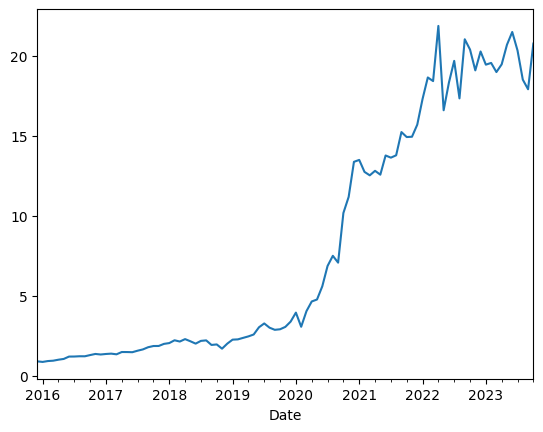

In [43]:
pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

In [44]:
s_p500 = yf.download('^GSPC', start=start).Close

[*********************100%%**********************]  1 of 1 completed
